In [ ]:
%pip install mesa

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

from model import CampusModel
from visualization import draw

In [25]:
G1 = nx.read_graphml("data/distances-graph.graphml")
G2 = nx.read_graphml("data/width-graph.graphml")

G = G1.copy()

In [26]:
tree = ET.parse("data/distances-graph.graphml")
root = tree.getroot()

ns = {
    "g": "http://graphml.graphdrawing.org/xmlns",
    "y": "http://www.yworks.com/xml/graphml"
}

nodeTypes = {'#FFCC00': 'building',
             '#33CCCC': 'court',
             '#808080': 'temporary-point',
             '#FF0000': 'restaurant',
             '#333333': 'parking',
             '#993366': 'entry/exit',
             '#FF00FF': 'outpatient',
             '#008000': 'bank',
             '#FFCC99': 'bathroom',
             '#008080': 'turnstile'}

nodeAdditionalInformation = {}

for node in root.findall(".//g:node", ns):
    nodeID = node.attrib['id']
    for data in node:
        for ShapeNode in data:
            for x in ShapeNode:
                if 'Fill' in str(x):
                    nodeColor = x.attrib['color']
                    nodeAdditionalInformation[nodeID] = nodeTypes[nodeColor]

for id, data in G.nodes(data=True):
    data['type'] = nodeAdditionalInformation[id]

G.nodes(data=True)

NodeDataView({'n0': {'x': '240.49176276261386', 'y': '-323.82526786920664', 'shape_type': 'ellipse', 'label': '01', 'type': 'building'}, 'n1': {'x': '334.15293899628216', 'y': '-267.12835572179273', 'shape_type': 'ellipse', 'label': '02', 'type': 'building'}, 'n2': {'x': '430.24649960532037', 'y': '-187.16675634425815', 'shape_type': 'ellipse', 'label': '03', 'type': 'building'}, 'n3': {'x': '513.235253693691', 'y': '-104.1316693602709', 'shape_type': 'ellipse', 'label': '04', 'type': 'building'}, 'n4': {'x': '655.2185015374988', 'y': '-49.064605831972735', 'shape_type': 'ellipse', 'label': '05', 'type': 'building'}, 'n5': {'x': '483.21366488598056', 'y': '97.67389039628904', 'shape_type': 'ellipse', 'label': '06', 'type': 'building'}, 'n6': {'x': '279.86608136631116', 'y': '80.16434688314905', 'shape_type': 'ellipse', 'label': '07', 'type': 'building'}, 'n7': {'x': '239.51735932886902', 'y': '110.16434688314905', 'shape_type': 'ellipse', 'label': '10', 'type': 'building'}, 'n8': {'x':

In [27]:
for u, v, data in G.edges(data=True):
    data['distance'] = data['label']
    data["width"] = G2.edges[u, v]['label']

In [28]:
G = G.to_undirected()

In [29]:
model = CampusModel(G, agent_qtd=50)


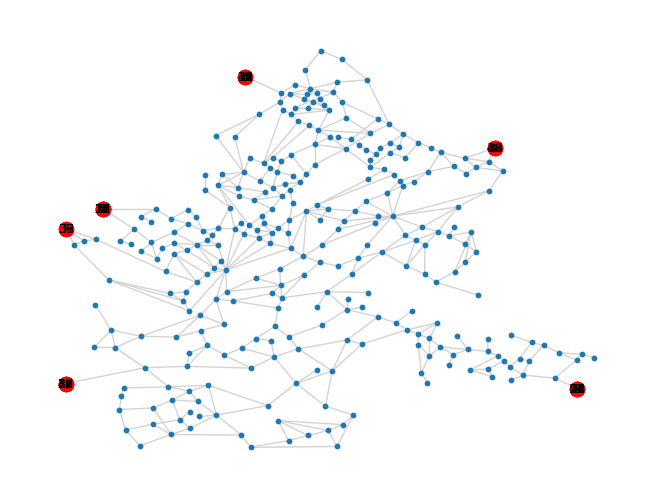

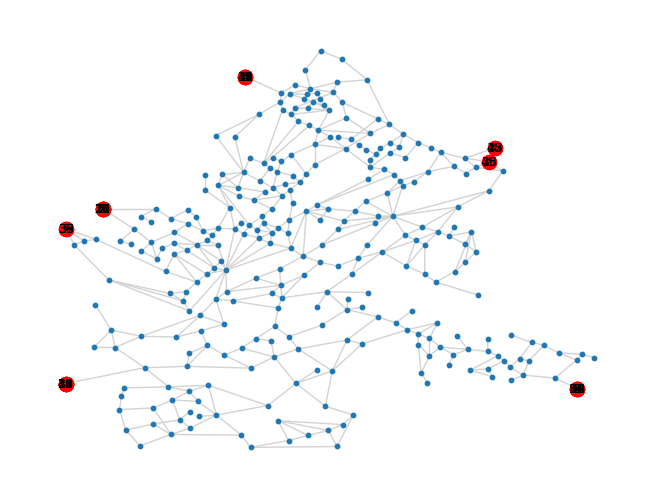

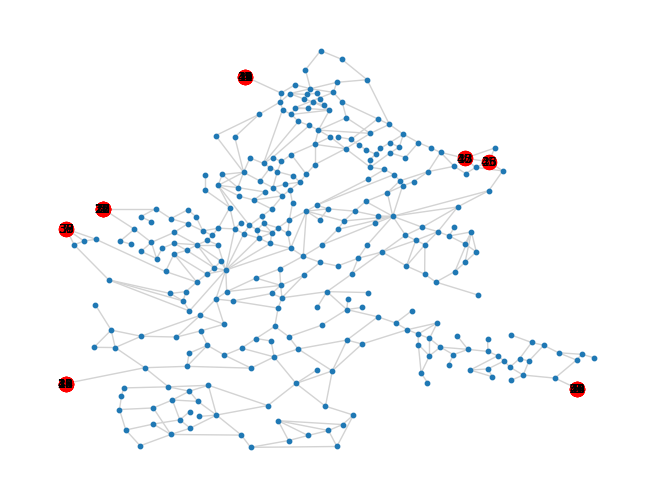

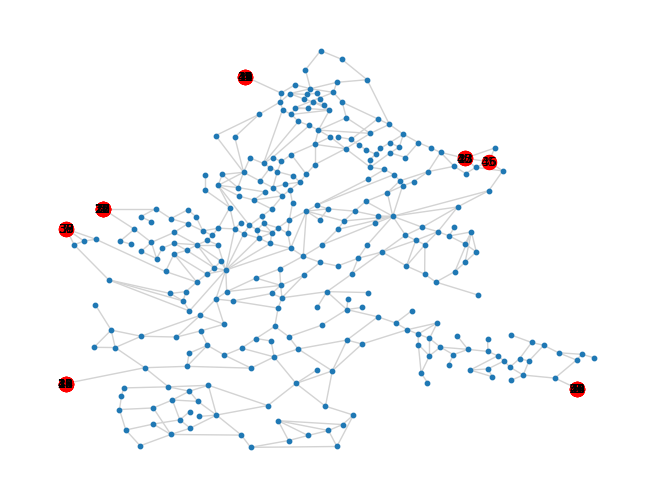

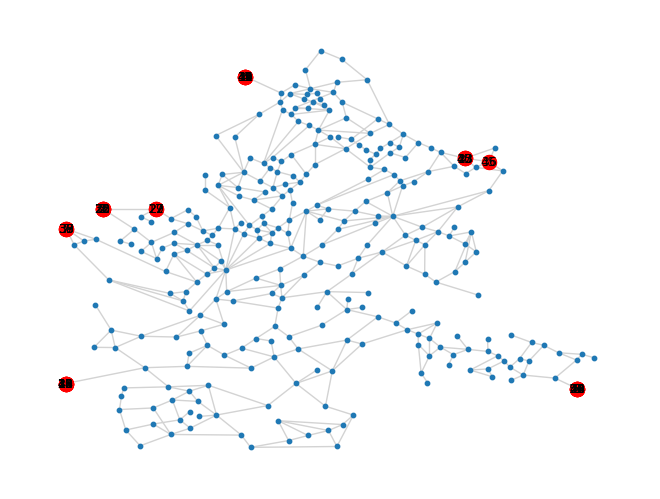

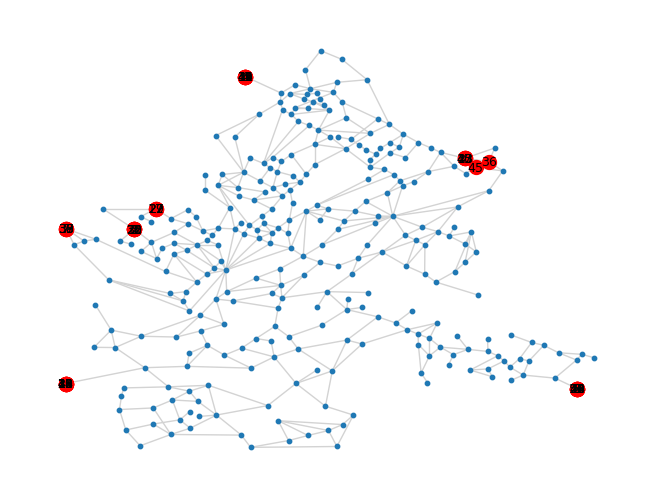

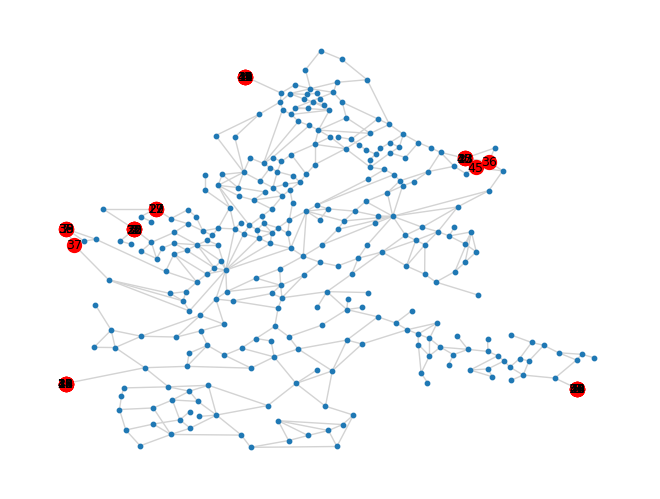

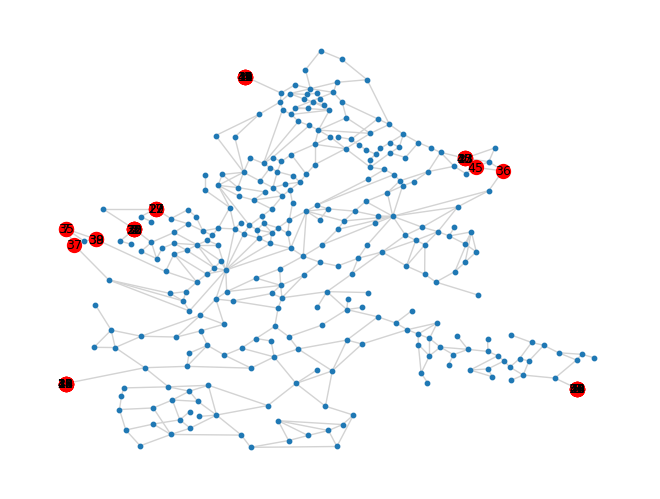

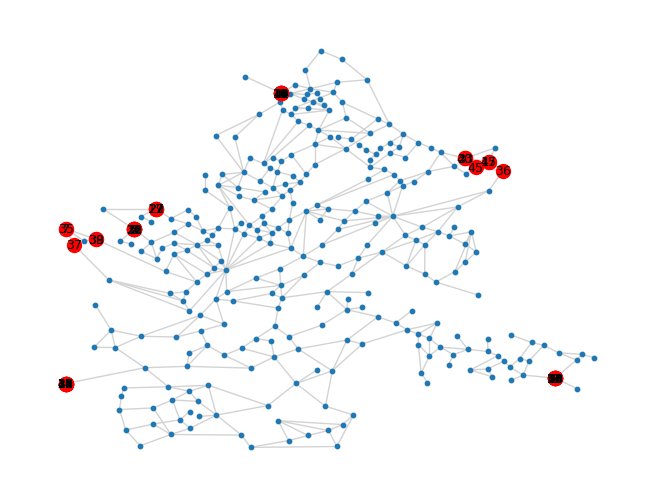

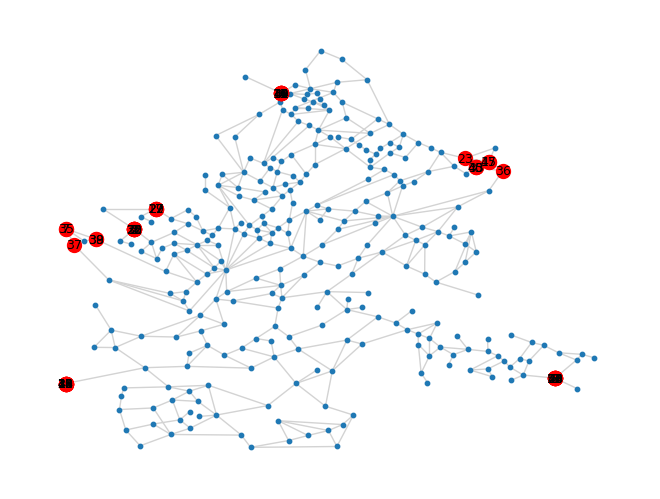

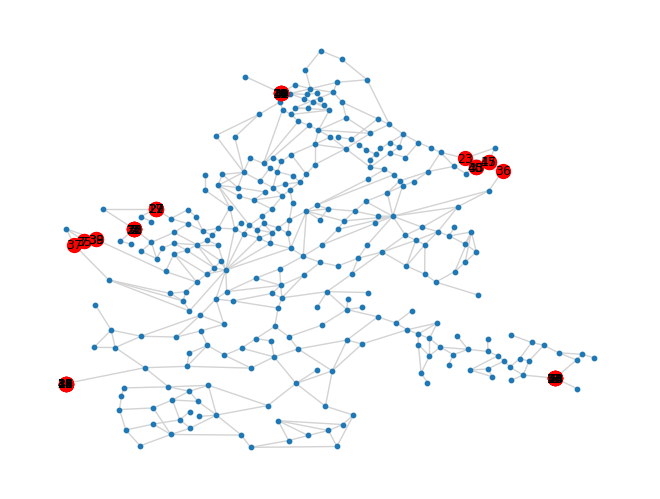

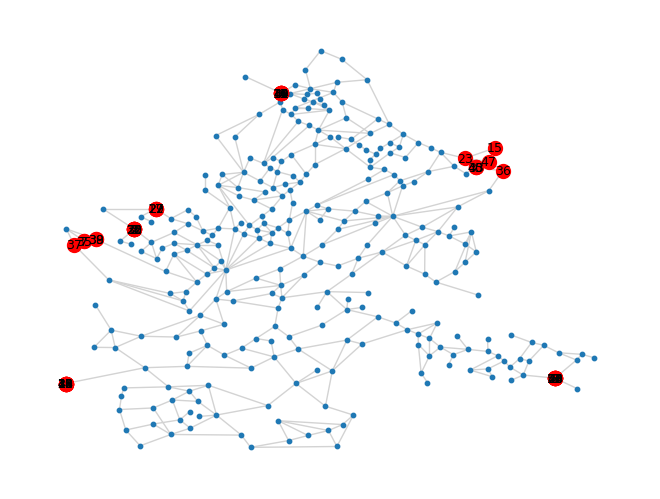

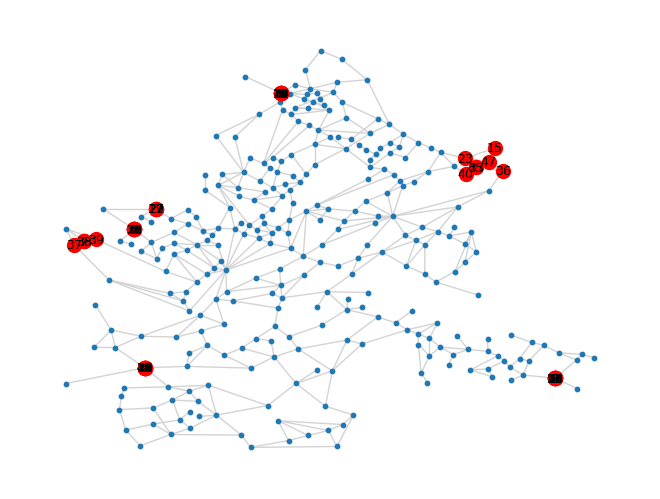

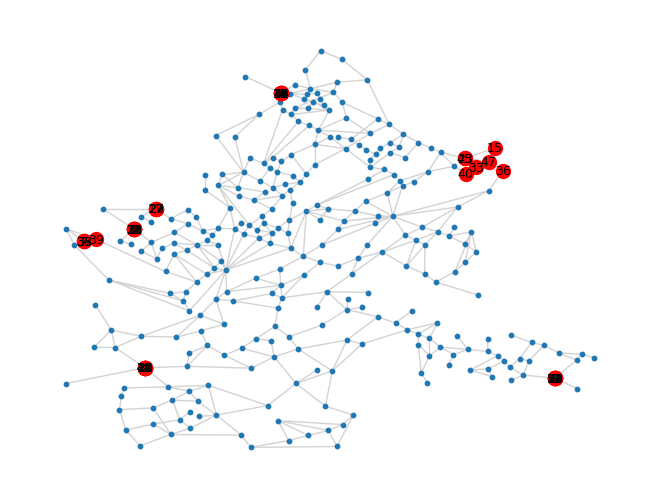

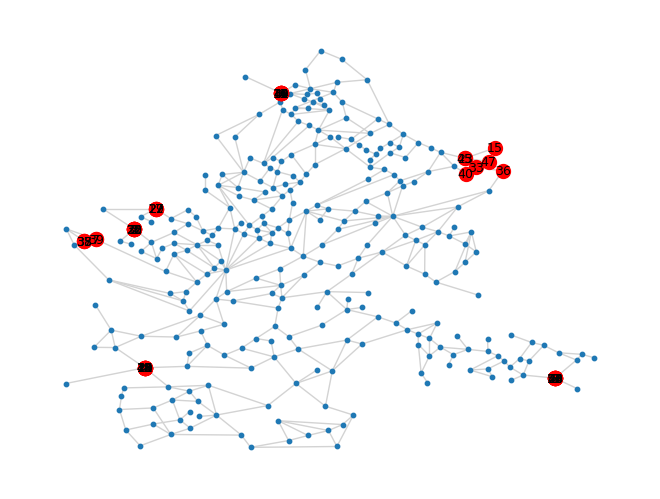

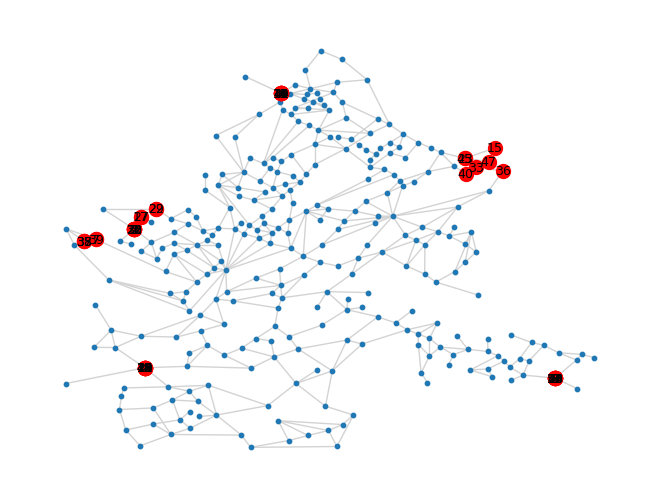

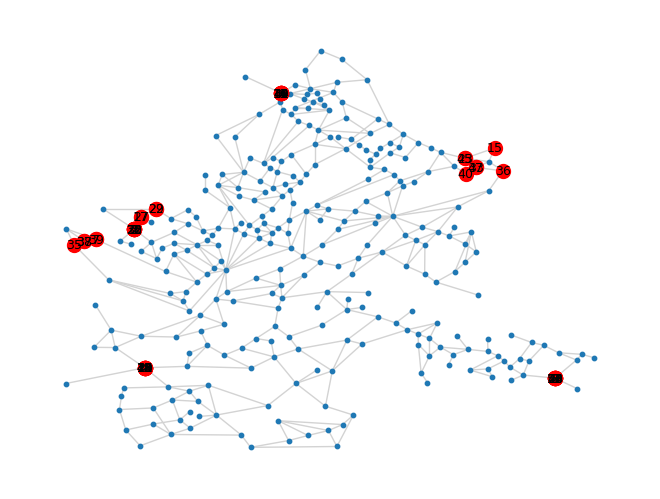

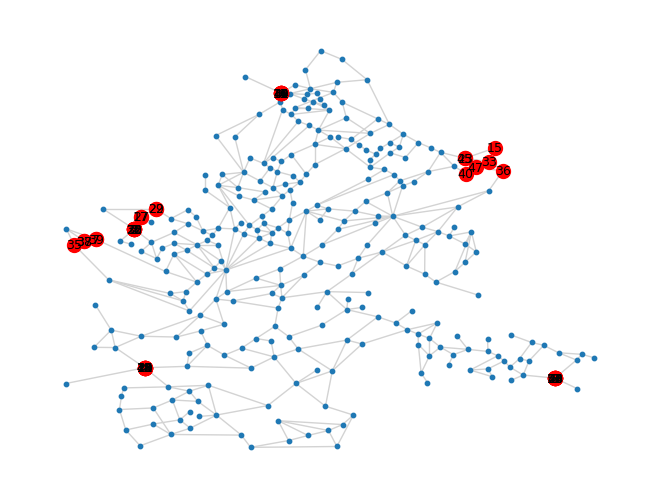

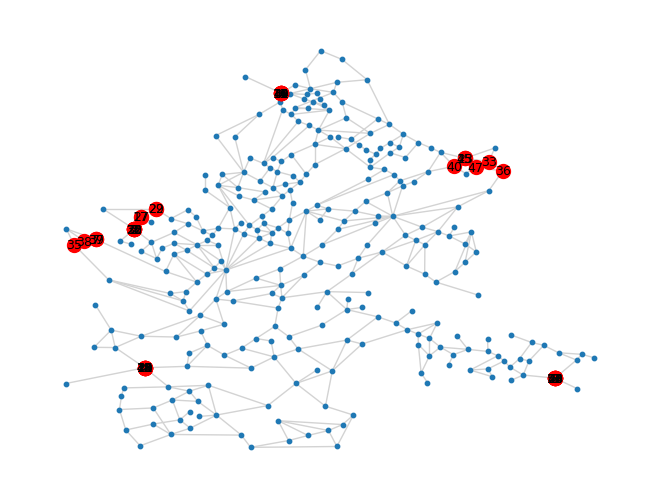

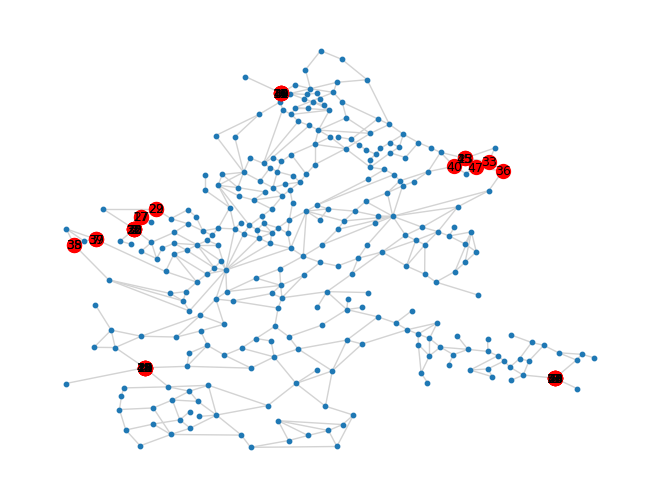

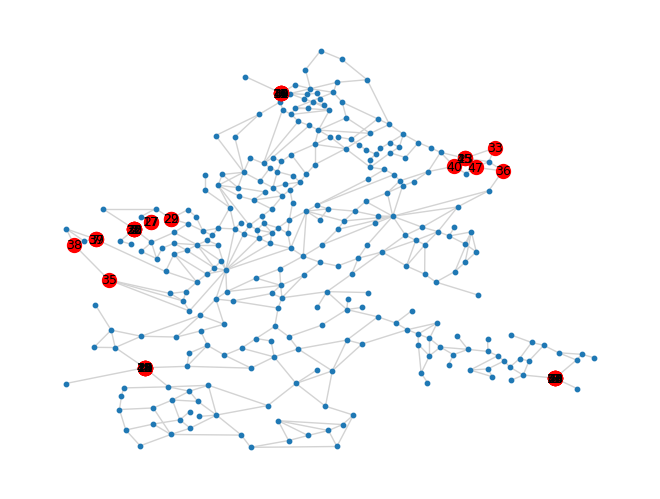

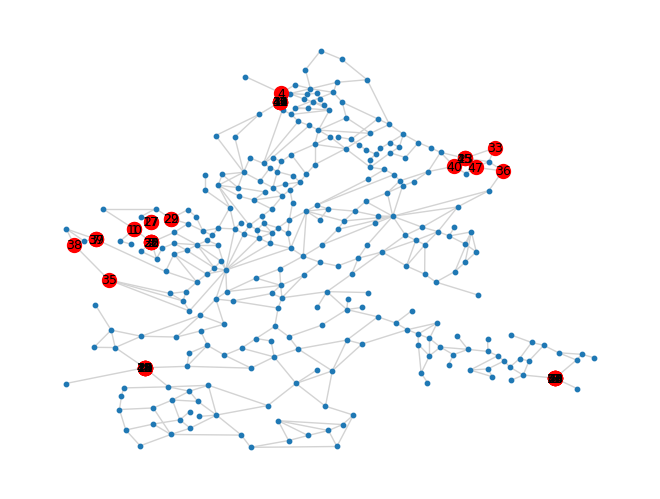

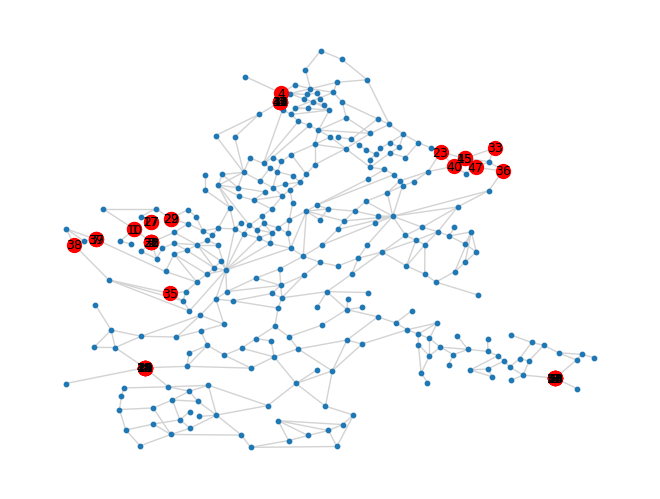

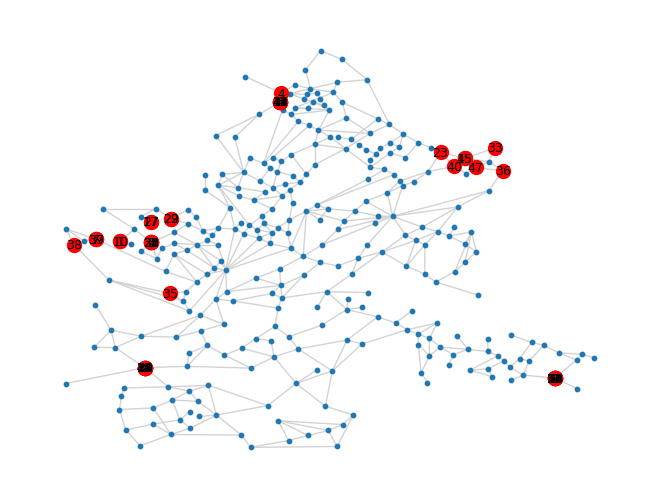

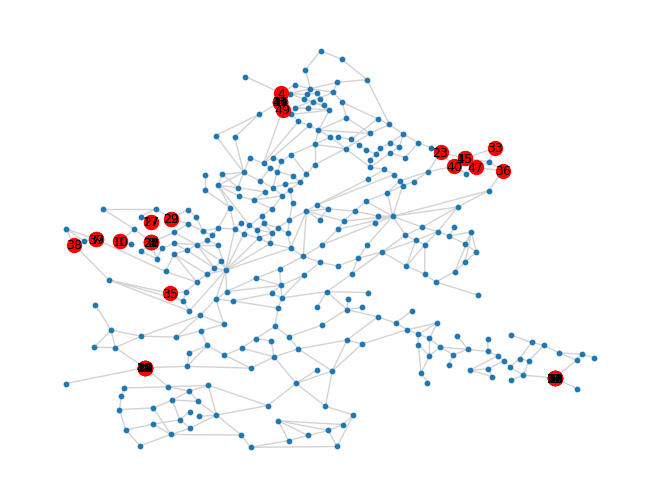

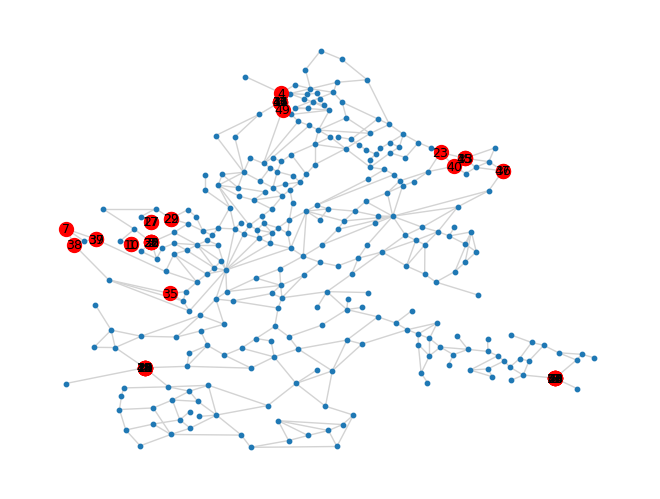

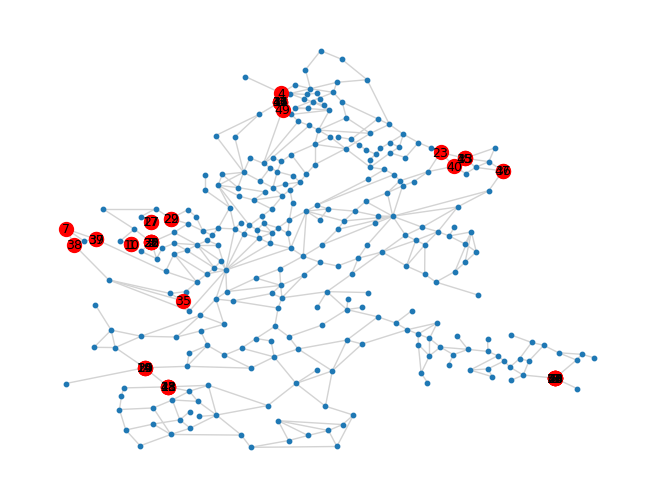

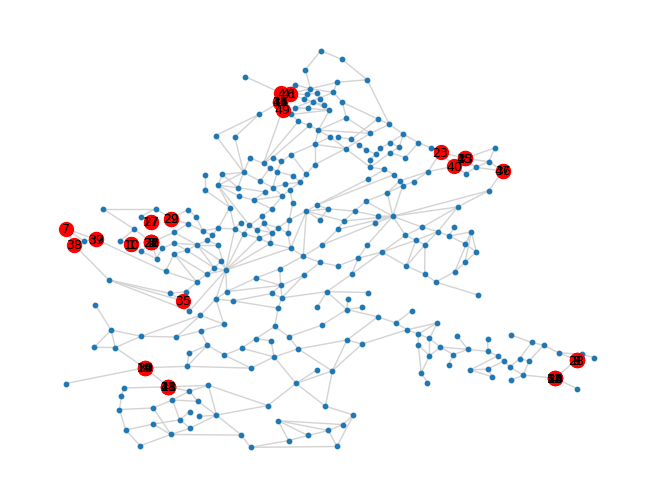

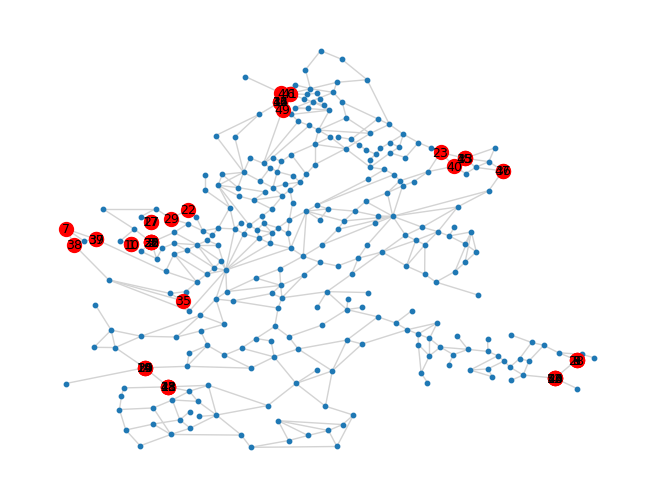

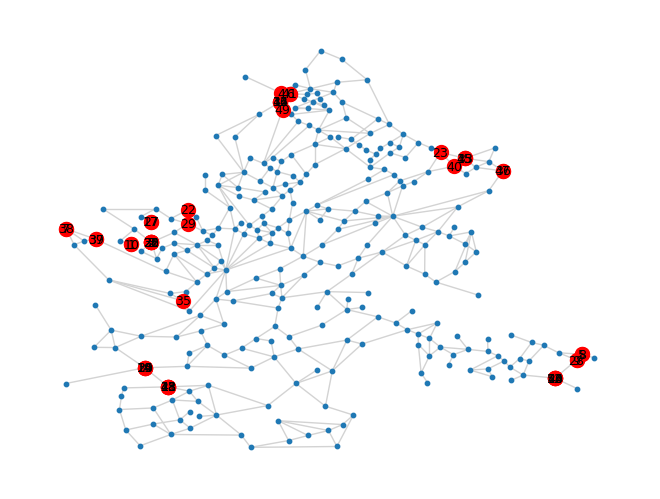

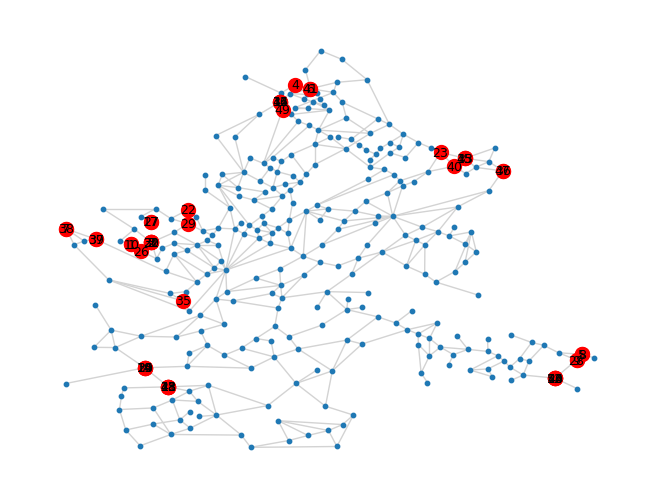

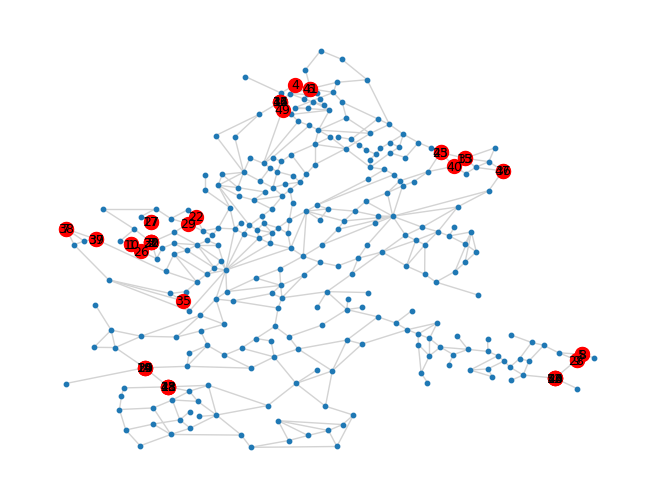

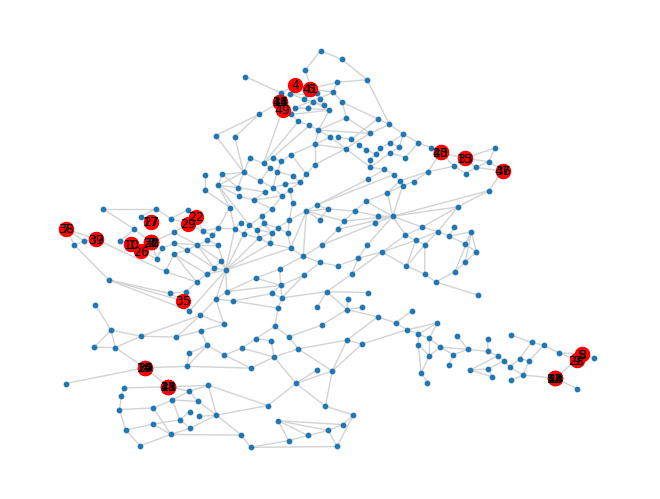

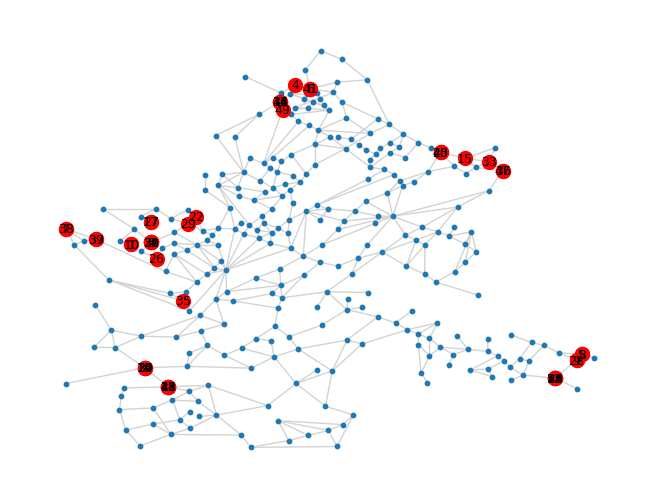

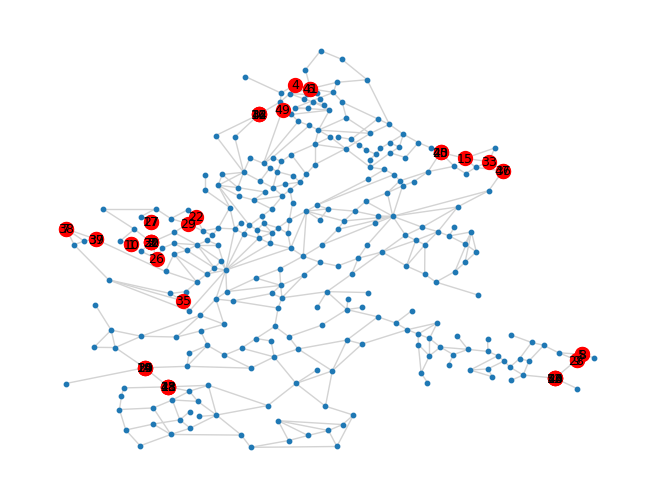

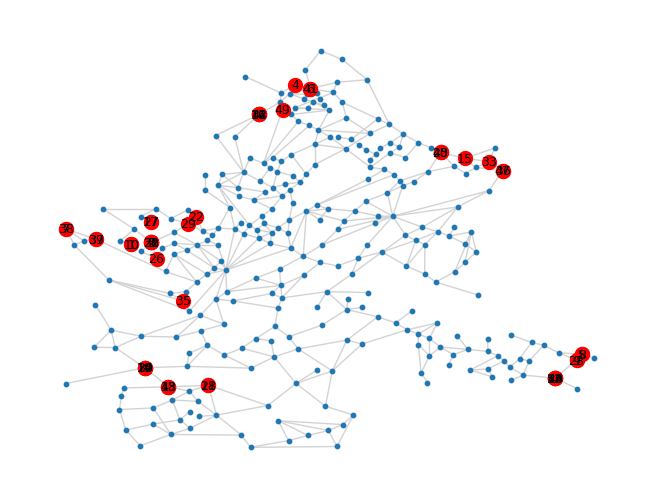

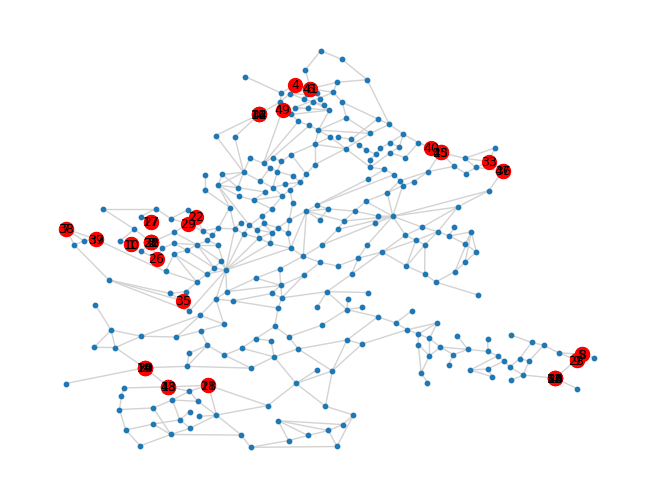

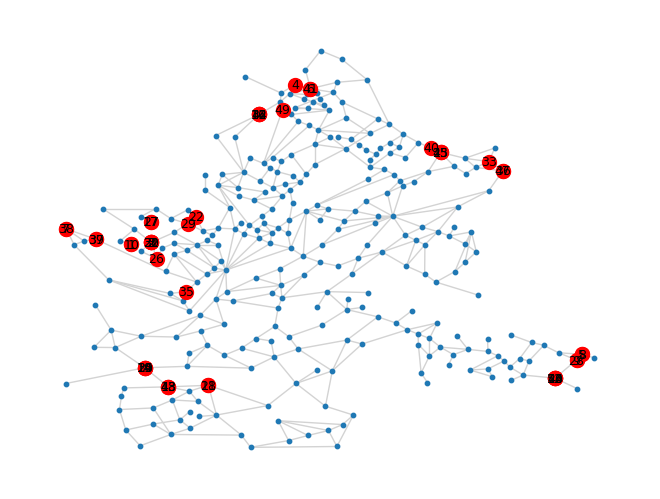

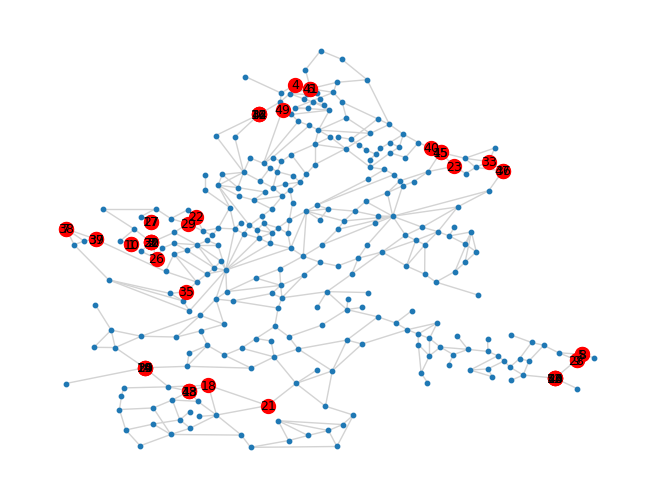

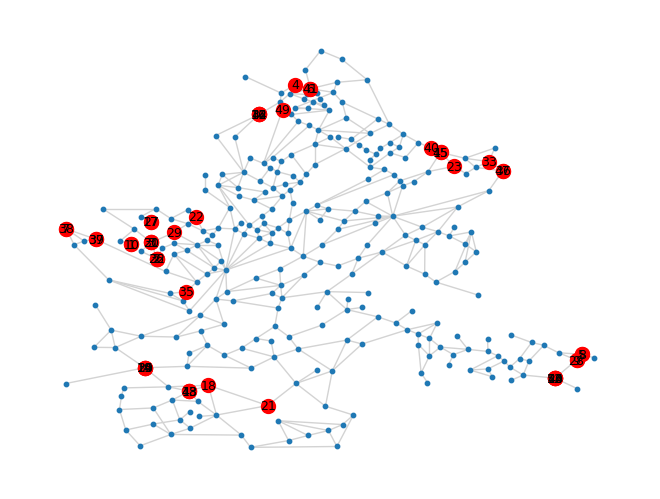

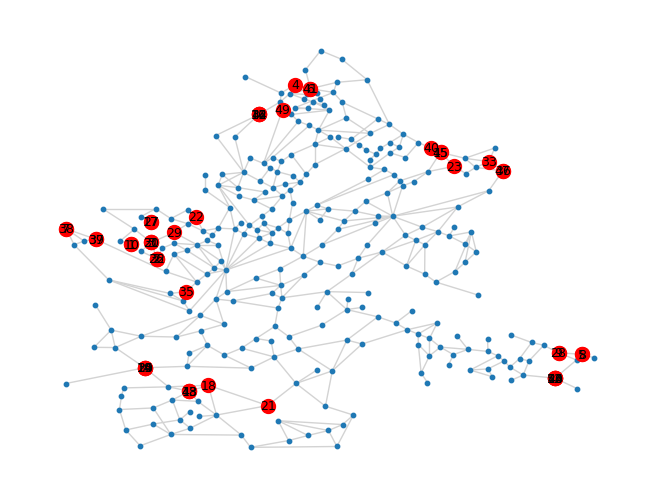

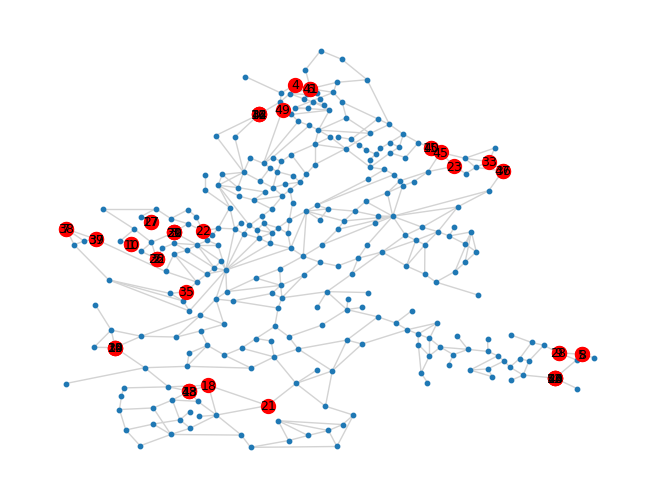

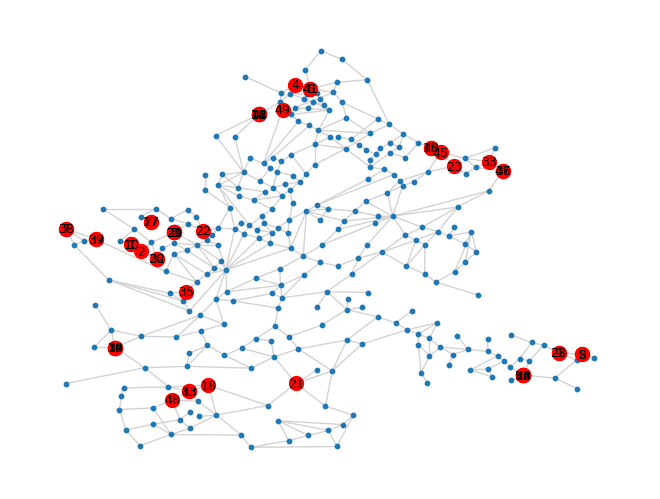

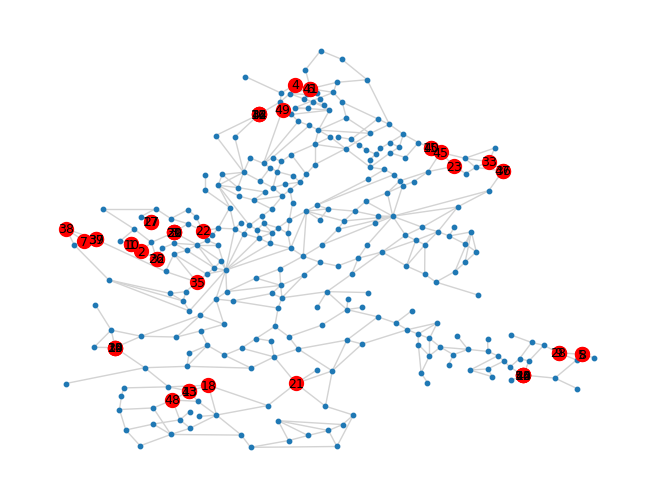

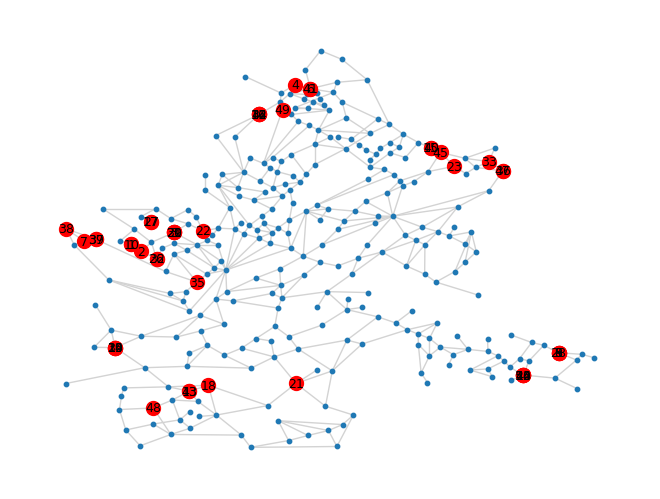

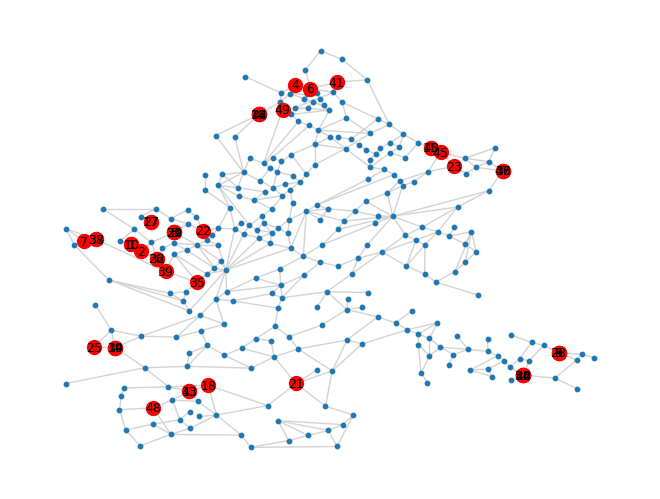

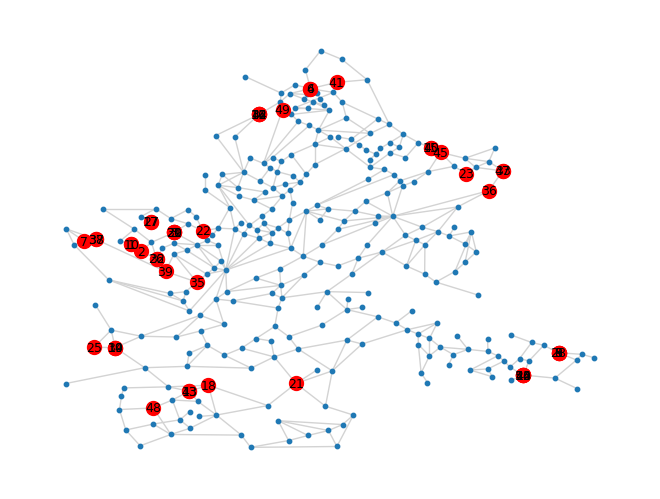

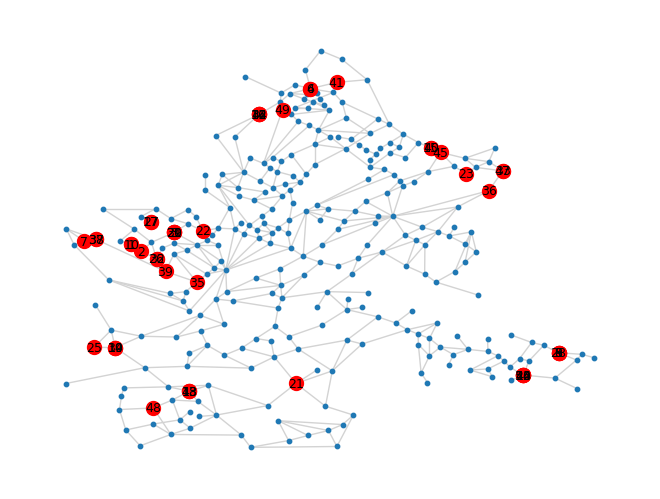

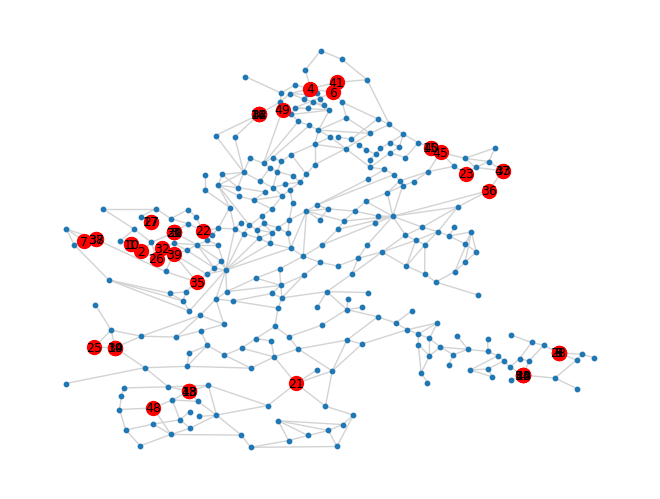

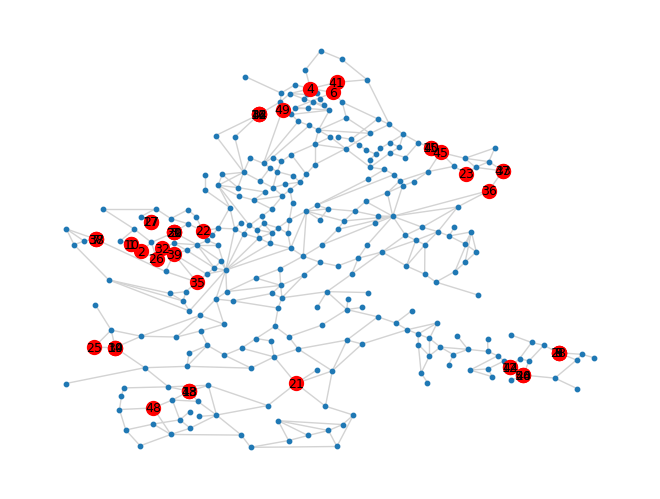

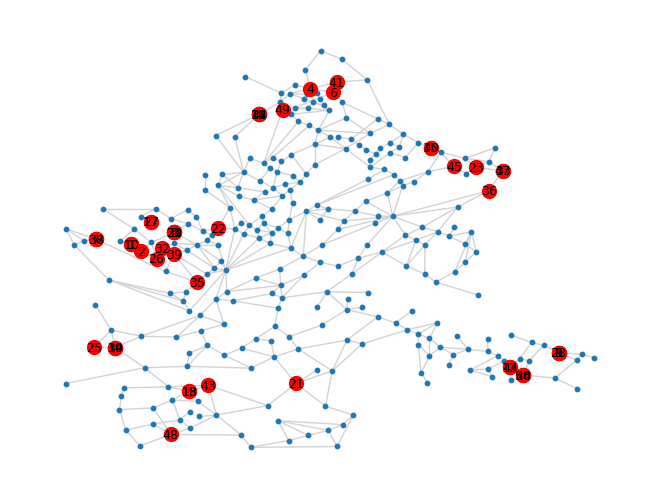

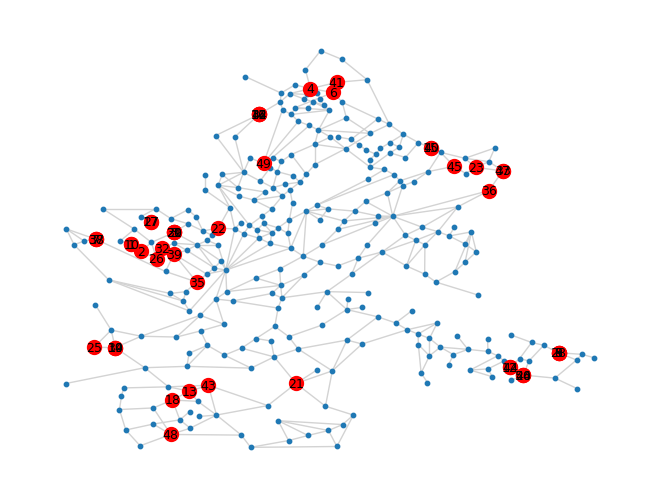

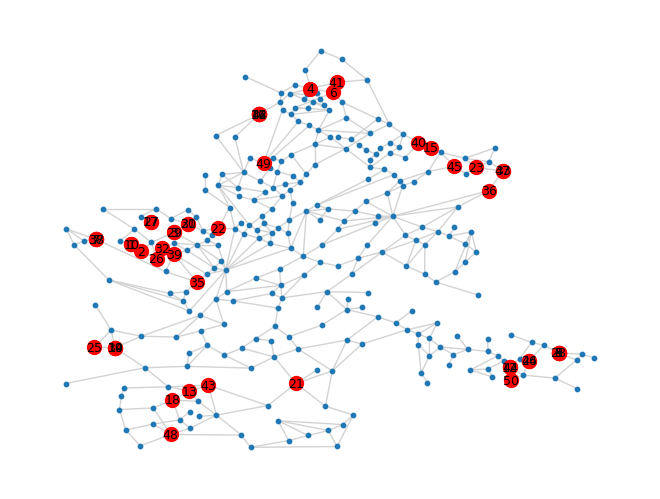

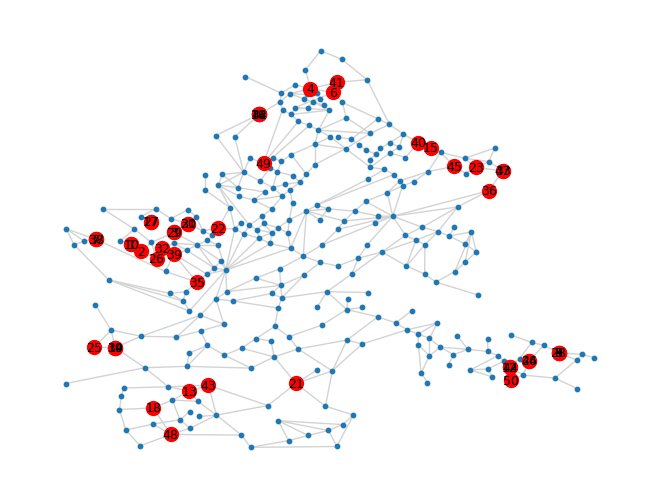

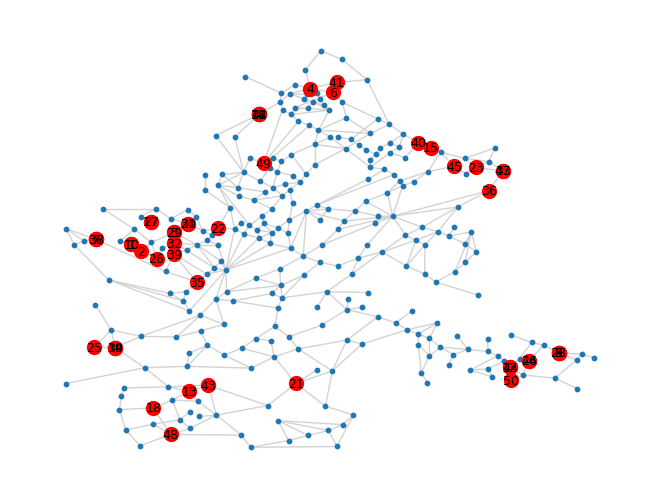

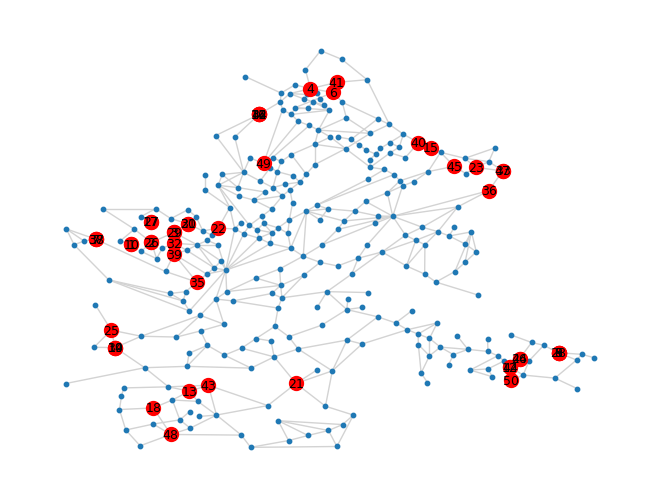

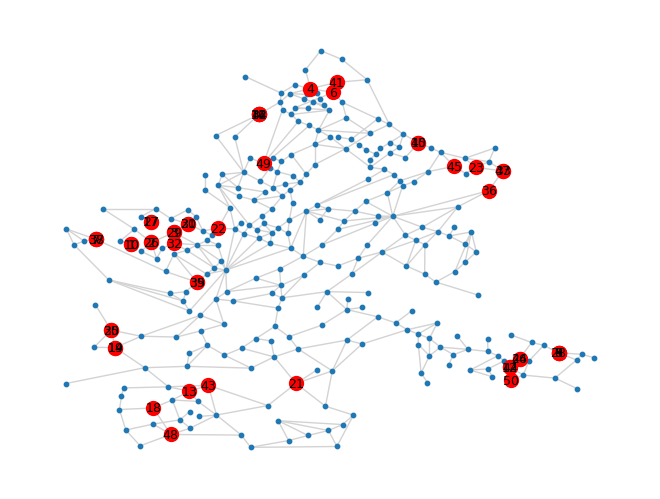

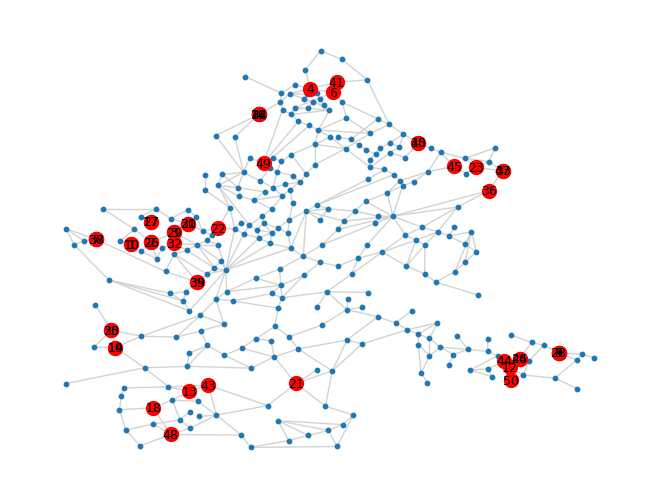

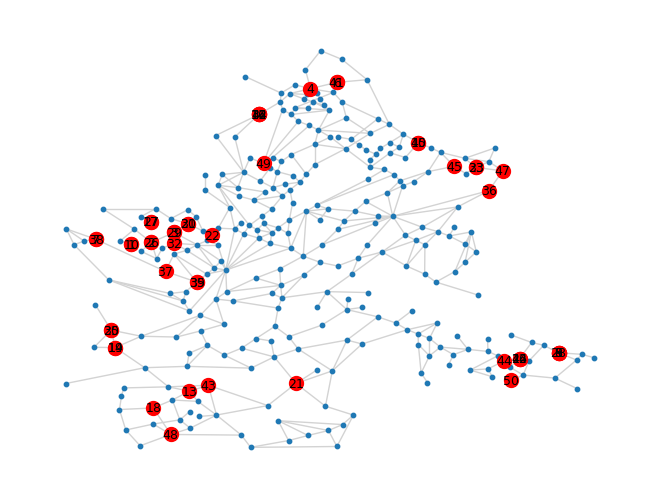

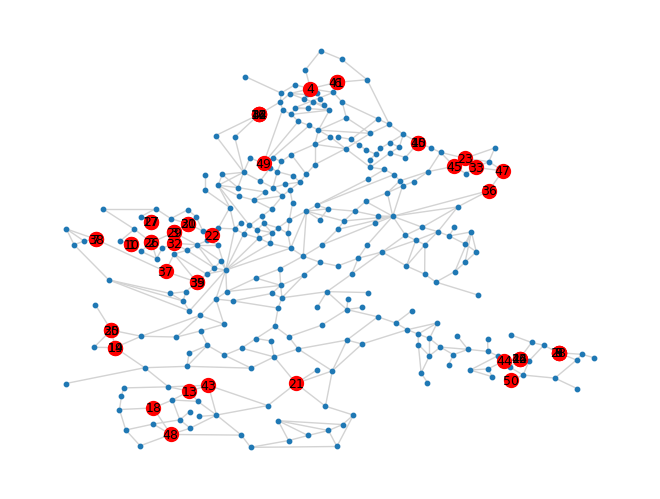

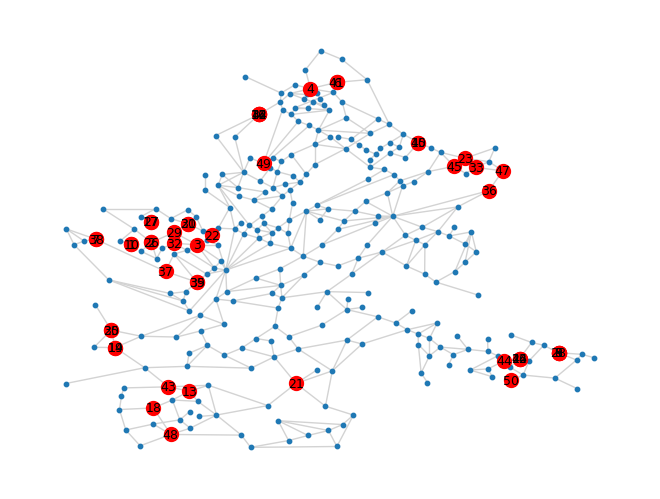

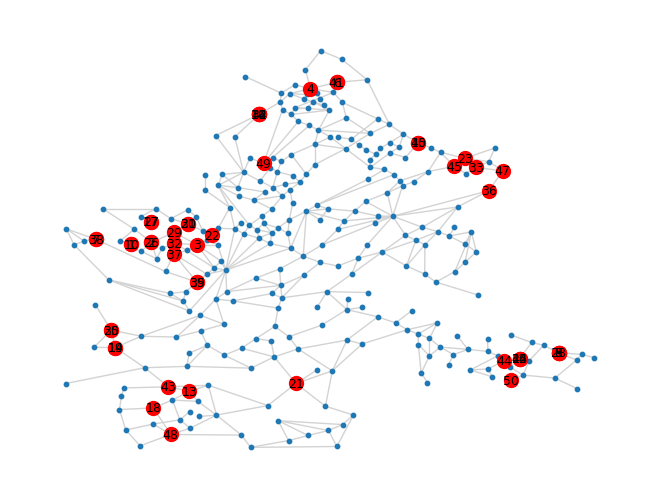

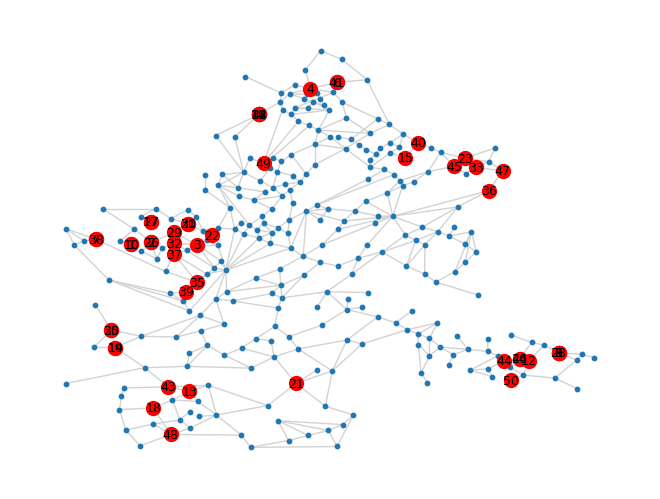

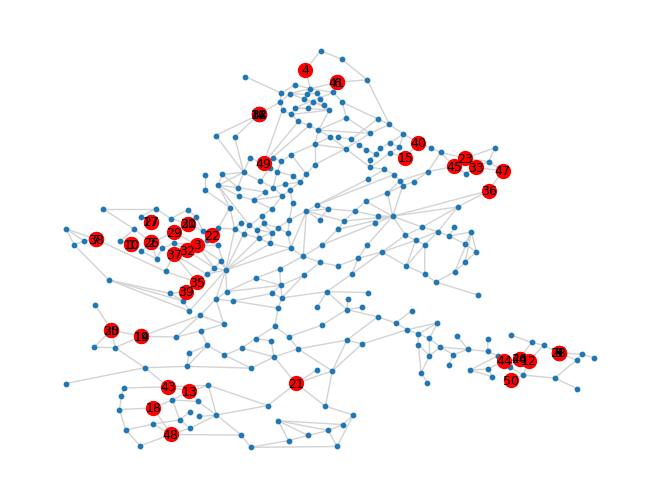

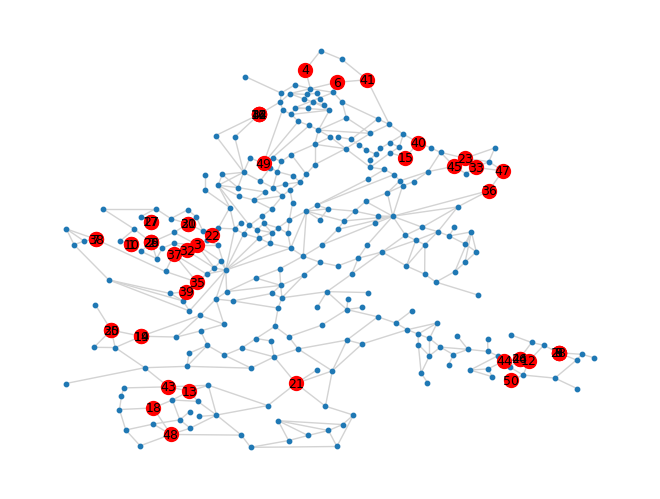

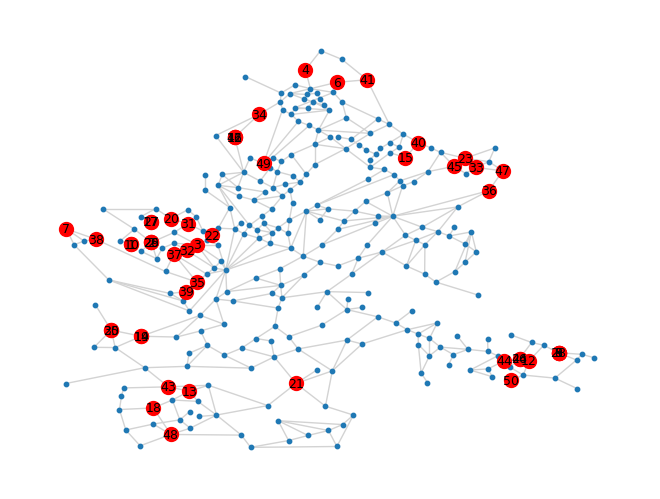

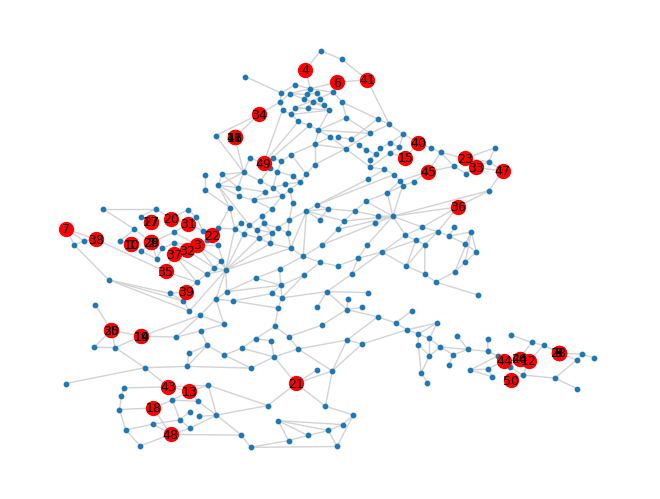

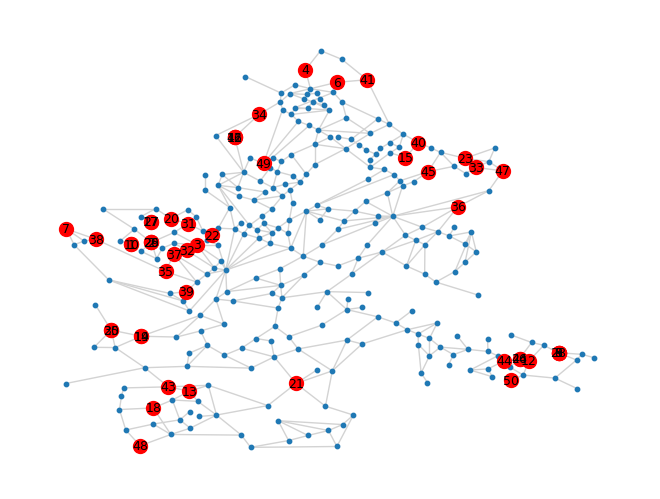

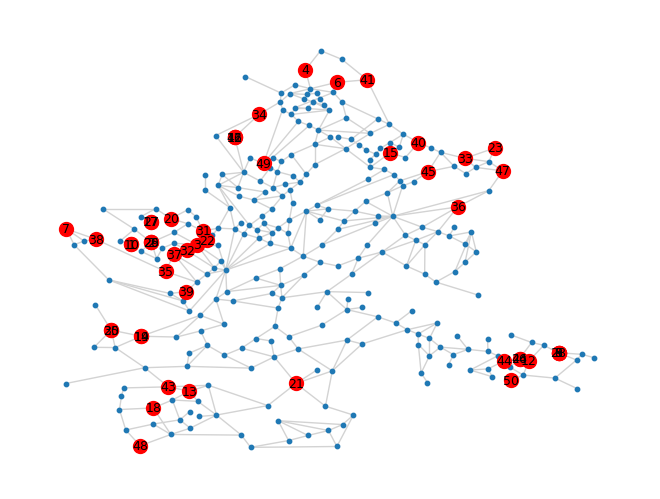

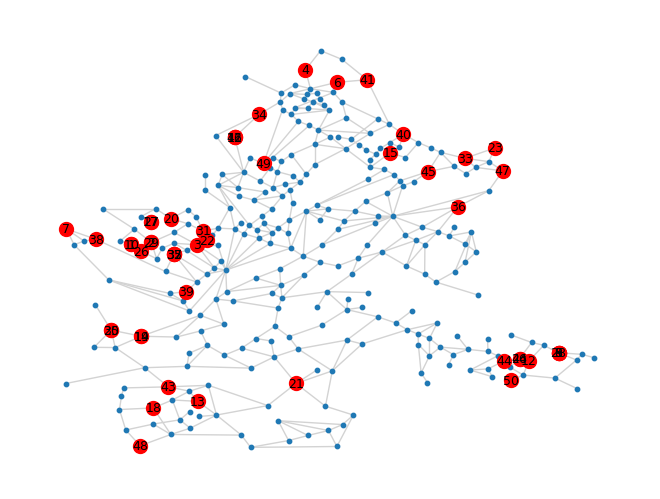

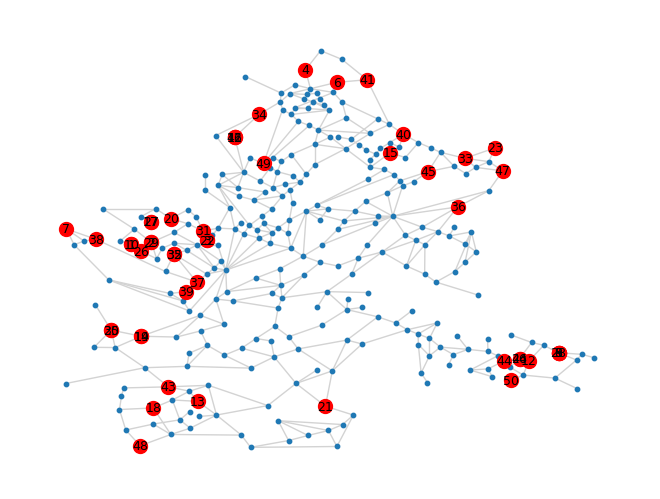

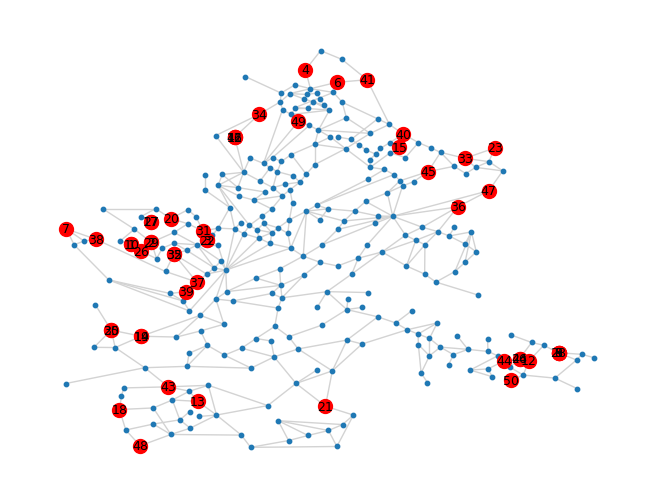

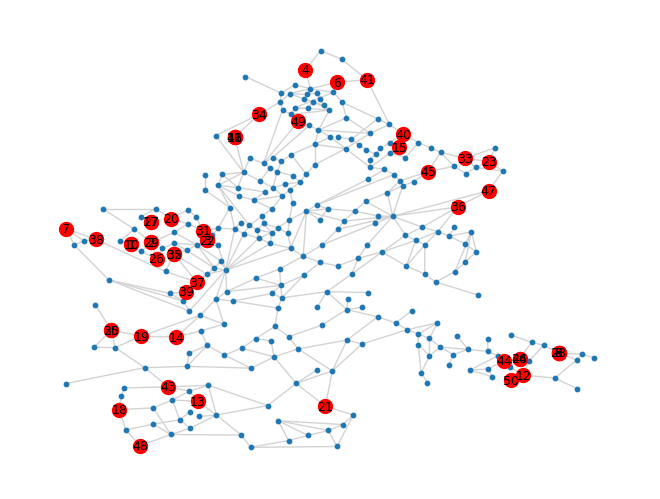

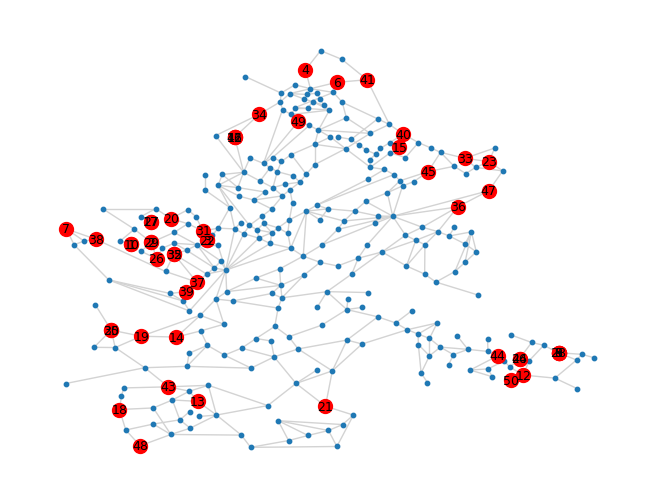

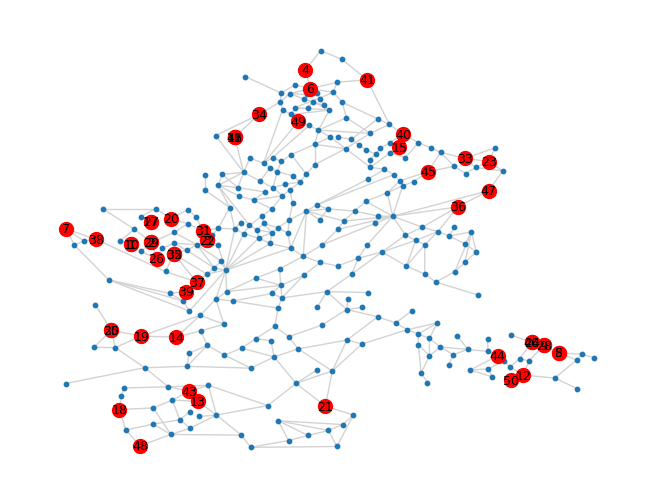

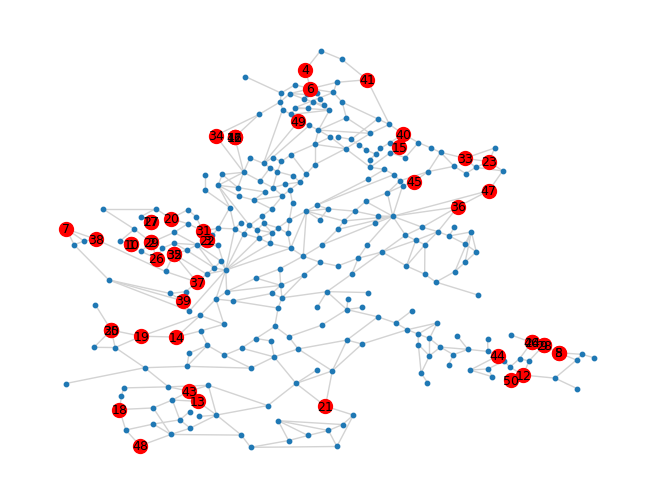

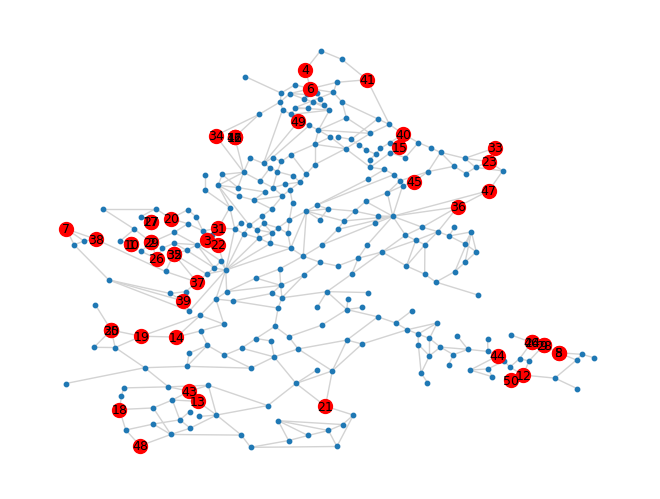

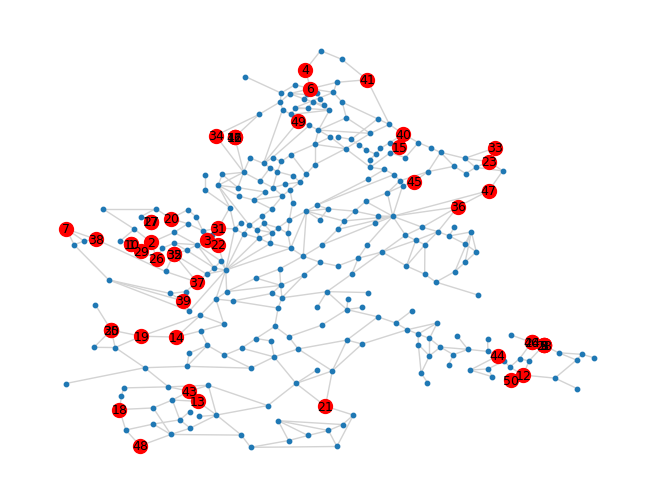

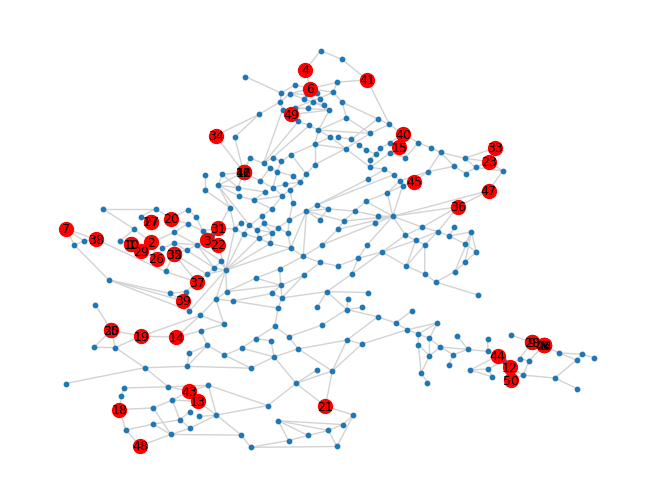

In [30]:
pos = {
    n: (float(data['x']), float(data['y'])) for n, data in G.nodes(data=True)
}

plt.ion()

draw(model, pos)
for i in range(100):
    model.step()
    result = model.anyone_moved
    if result:
        #print(f"\nTempo: {i}\n")
        draw(model, pos)

plt.ioff()
plt.show()